<a href="https://colab.research.google.com/github/Abhilashkumar041/Advance_Machine_Learning_model/blob/main/CO2_Emission_Rawanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of CO2 Emission in Rawanda..
### Data is taken from Kaggle ( CO2 Emission Challenge)
#### The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.

In [349]:
### Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [350]:
! pip install opendatasets

In [351]:
import opendatasets as od

In [352]:
od.download("https://www.kaggle.com/competitions/playground-series-s3e20/data")

Skipping, found downloaded files in "./playground-series-s3e20" (use force=True to force download)


In [353]:
### Loading the traning data set

df = pd.read_csv("/content/playground-series-s3e20/train.csv")

In [354]:
### Checking the traning dataset details

df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                                 NaN                                 NaN   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   
2                          23.206415   
3                                NaN   
4                          24.331972   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   
2                                       0.000154   
3                                            NaN   
4                                      -0.000028   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   
2                                 0.035338   
3                                 0.036790   
4                                 0.034675   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   
2                               2703.236800                  2809.138386   
3                               2076.073332                  3917.707873   
4                               2053.608490                  2667.310013   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   829530.500000                            71.111977   
1                   829787.287130                            -1.019594   
2                   829883.828686                           -54.801144   
3                   829657.163571                            28.916541   
4                   829735.093750                           -12.501663   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [355]:
### Checking the shape of the dataset

df.shape

(79023, 76)

In [356]:
### Loading the test dataset

df_test = pd.read_csv("/content/playground-series-s3e20/test.csv")
df_test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                            NaN                                  NaN   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                                 NaN                                 NaN   
1                           15.600607                         -140.529848   
2                           39.889060                         -136.908976   
3                           58.862543                         -152.999440   
4                           15.646016                         -135.794754   

   SulphurDioxide_solar_zenith_angle  \
0                                NaN   
1                          28.896124   
2                          30.054682   
3                          21.806625   
4                          24.328299   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                            NaN   
1                                       0.000157   
2                                       0.000053   
3                                       0.000093   
4                                      -0.000077   

   CarbonMonoxide_CO_column_number_density  \
0                                      NaN   
1                                 0.037641   
2                                 0.037795   
3                                 0.039743   
4                                 0.039232   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                       NaN                          NaN   
1                               1688.656342                  2814.309683   
2                               2629.692089                  3233.654973   
3                               1905.403107                  3157.021515   
4                               1307.190702                  2228.402754   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                             NaN                                  NaN   
1                   829652.957598                            26.072167   
2                   829589.971617                            14.881259   
3                   829691.671875                           -12.772312   
4                   829847.718216                           -40.978057   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [357]:
### Checking the shape of the dataset

df_test.shape

(24353, 75)

**Data PreProcessing**

In [358]:
#### Checking  the missing data in training dataset, also calculating the missing value percentage

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_info

Missing Values  \
UvAerosolLayerHeight_aerosol_height                          78584   
UvAerosolLayerHeight_solar_zenith_angle                      78584   
UvAerosolLayerHeight_solar_azimuth_angle                     78584   
UvAerosolLayerHeight_sensor_azimuth_angle                    78584   
UvAerosolLayerHeight_aerosol_pressure                        78584   
UvAerosolLayerHeight_aerosol_optical_depth                   78584   
UvAerosolLayerHeight_sensor_zenith_angle                     78584   
NitrogenDioxide_tropopause_pressure                          18320   
NitrogenDioxide_stratospheric_NO2_column_number...           18320   
NitrogenDioxide_NO2_slant_column_number_density              18320   
NitrogenDioxide_cloud_fraction                               18320   
NitrogenDioxide_absorbing_aerosol_index                      18320   
NitrogenDioxide_NO2_column_number_density                    18320   
NitrogenDioxide_sensor_altitude                              18320   
NitrogenDioxide_sensor_azimuth_angle                         18320   
NitrogenDioxide_sensor_zenith_angle                          18320   
NitrogenDioxide_solar_azimuth_angle                          18320   
NitrogenDioxide_tropospheric_NO2_column_number_...           18320   
NitrogenDioxide_solar_zenith_angle                           18320   
SulphurDioxide_SO2_column_number_density_15km                14609   
SulphurDioxide_solar_zenith_angle                            14609   
SulphurDioxide_solar_azimuth_angle                           14609   
SulphurDioxide_sensor_zenith_angle                           14609   
SulphurDioxide_sensor_azimuth_angle                          14609   
SulphurDioxide_cloud_fraction                                14609   
SulphurDioxide_SO2_slant_column_number_density               14609   
SulphurDioxide_SO2_column_number_density_amf                 14609   
SulphurDioxide_SO2_column_number_density                     14609   
Formaldehyde_sensor_zenith_angle                              7277   
Formaldehyde_solar_azimuth_angle                              7277   
Formaldehyde_cloud_fraction                                   7277   
Formaldehyde_sensor_azimuth_angle                             7277   
Formaldehyde_HCHO_slant_column_number_density                 7277   
Formaldehyde_solar_zenith_angle                               7277   
Formaldehyde_tropospheric_HCHO_column_number_de...            7277   
Formaldehyde_tropospheric_HCHO_column_number_de...            7277   
CarbonMonoxide_solar_zenith_angle                             2122   
CarbonMonoxide_CO_column_number_density                       2122   
CarbonMonoxide_solar_azimuth_angle                            2122   
CarbonMonoxide_sensor_zenith_angle                            2122   
CarbonMonoxide_sensor_azimuth_angle                           2122   
CarbonMonoxide_H2O_column_number_density                      2122   
CarbonMonoxide_cloud_height                                   2122   
CarbonMonoxide_sensor_altitude                                2122   
Ozone_cloud_fraction                                           548   
Ozone_O3_effective_temperature                                 548   
Ozone_solar_zenith_angle                                       548   
Ozone_solar_azimuth_angle                                      548   
Ozone_sensor_zenith_angle                                      548   
Ozone_sensor_azimuth_angle                                     548   
Ozone_O3_column_number_density_amf                             548   
Ozone_O3_slant_column_number_density                           548   
Ozone_O3_column_number_density                                 548   
UvAerosolIndex_solar_zenith_angle                              539   
UvAerosolIndex_solar_azimuth_angle                             539   
UvAerosolIndex_sensor_zenith_angle                             539   
UvAerosolIndex_sensor_azimuth_angle                           

In [359]:
### Removing the all columns where missing values is greater than 70%

high_missing_values_cols = []

for i in missing_info.index:
    missing_percentage = missing_info.loc[i, 'Missing Percentage']
    if missing_percentage  > 70.00:
        high_missing_values_cols.append(i)

high_missing_values_cols

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_solar_zenith_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle']

In [360]:
df = df[[col for col in df.columns if col not in high_missing_values_cols]]

In [361]:
df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                                 NaN                                 NaN   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   
2                          23.206415   
3                                NaN   
4                          24.331972   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   
2                                       0.000154   
3                                            NaN   
4                                      -0.000028   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   
2                                 0.035338   
3                                 0.036790   
4                                 0.034675   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   
2                               2703.236800                  2809.138386   
3                               2076.073332                  3917.707873   
4                               2053.608490                  2667.310013   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   829530.500000                            71.111977   
1                   829787.287130                            -1.019594   
2                   829883.828686                           -54.801144   
3                   829657.163571                            28.916541   
4                   829735.093750                           -12.501663   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [362]:
df.shape

(79023, 69)

In [363]:
### Dropping some more irrelevant cols from dataframe

df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1,inplace = True)

In [364]:
remaining_columns = [col for col in missing_info.index if col not in high_missing_values_cols]
remaining_columns

['NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_column_number_density',
 'Formaldehyde_sensor_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'Formald

In [365]:
if 'ID_LAT_LON_YEAR_WEEK' in remaining_columns:
    remaining_columns.remove('ID_LAT_LON_YEAR_WEEK')

In [366]:
### Filling remaning columns with mean of the datasets

df[remaining_columns] = df[remaining_columns].fillna(df.mean())

In [367]:
df.isnull().sum()

latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMonoxide_cloud_height                                 0
CarbonMo

**Data Analysis ( Univariate, Bivariate & Multivariate )**

In [368]:
df.head(2)

latitude  longitude  year  week_no  \
0     -0.51      29.29  2019        0   
1     -0.51      29.29  2019        1   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    829530.50000                            71.111977   
1                    829787.28713                            -1.019594   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                           52.775928                         -149.875565   
1                           38.982368                         -140.158048   

   CarbonMonoxide_solar_zenith_angle  \
0                          25.965214   
1                          29.562000   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000044   
1                                   0.000047   

   NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                           0.000012        
1                                           0.000016        

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000032         
1                                           0.000030         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000097   
1                                         0.000093   

   NitrogenDioxide_tropopause_pressure  \
0                          8922.568995   
1                          7311.869141   

   NitrogenDioxide_absorbing_aerosol_index  NitrogenDioxide_cloud_fraction  \
0                                -1.812155                        0.097008   
1                                -1.935386                        0.067038   

   NitrogenDioxide_sensor_altitude  NitrogenDioxide_sensor_azimuth_angle  \
0                    829994.224471                            -15.937696   
1                    829859.960368                              5.471037   

   NitrogenDioxide_sensor_zenith_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            36.852637                           -84.260082   
1                            35.265195                          -138.343908   

   NitrogenDioxide_solar_zenith_angle  \
0                           28.316388   
1                           30.054262   

   Formaldehyde_tropospheric_HCHO_column_number_density  \
0                                           0.000117      

In [369]:
#### Creating the subsets of dataset based on the common gases information we have in orignal datasets

gas_prefixes = ['SulphurDioxide', 'CarbonMonoxide', 'NitrogenDioxide', 'Formaldehyde', 'UvAerosolIndex', 'Ozone', 'Cloud']
gas_data = {}

for prefix in gas_prefixes:
    current_gas_columns = df.columns[df.columns.str.startswith(prefix)]

    current_gas_df = df[current_gas_columns].copy()

    gas_data[prefix] = current_gas_df


In [370]:
### Checking every single seprated gas dataset

sulphur_dioxide_df = gas_data['SulphurDioxide']
CarbonMonoxide_df = gas_data['CarbonMonoxide']
NitrogenDioxide_df = gas_data['NitrogenDioxide']
Formaldehyde_df = gas_data['Formaldehyde']
UvAerosolIndex_df = gas_data['UvAerosolIndex']
Ozone_df = gas_data['Ozone']
Cloud_df = gas_data['Cloud']


In [371]:
sulphur_dioxide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SulphurDioxide_SO2_column_number_density        79023 non-null  float64
 1   SulphurDioxide_SO2_column_number_density_amf    79023 non-null  float64
 2   SulphurDioxide_SO2_slant_column_number_density  79023 non-null  float64
 3   SulphurDioxide_cloud_fraction                   79023 non-null  float64
 4   SulphurDioxide_sensor_azimuth_angle             79023 non-null  float64
 5   SulphurDioxide_sensor_zenith_angle              79023 non-null  float64
 6   SulphurDioxide_solar_azimuth_angle              79023 non-null  float64
 7   SulphurDioxide_solar_zenith_angle               79023 non-null  float64
 8   SulphurDioxide_SO2_column_number_density_15km   79023 non-null  float64
dtypes: float64(9)
memory usage: 5.4 MB


**Now Checking the relation between every gas dataset individually**

**Dealing with SulphurDioxide Gases columns first**

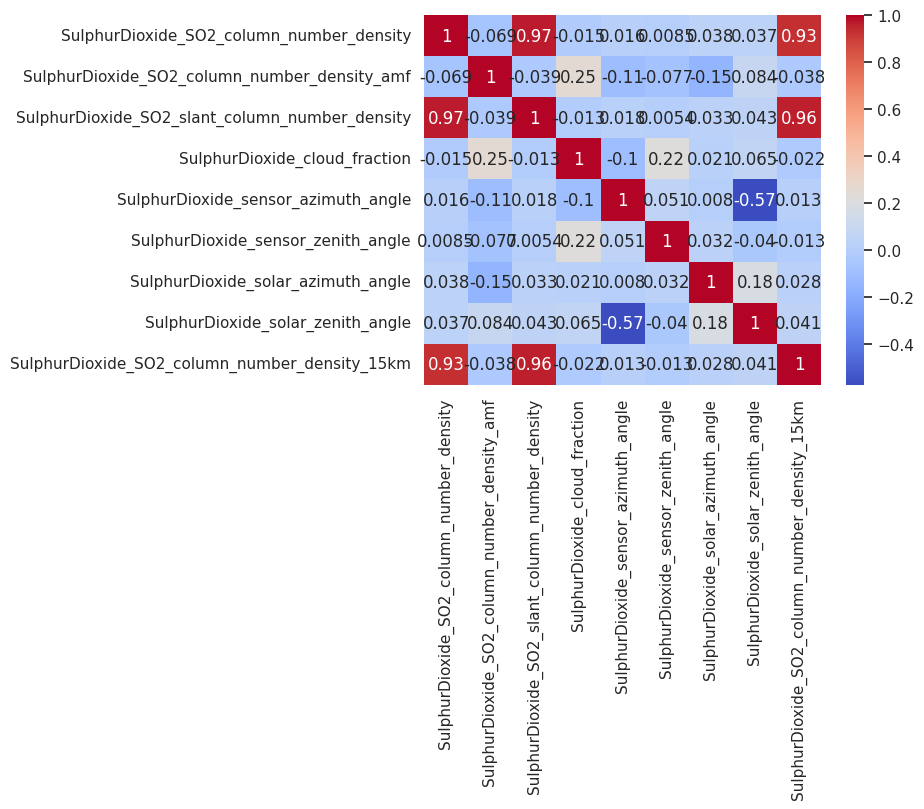

In [372]:
### Checking SulphurDioxide details

sns.heatmap(sulphur_dioxide_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [373]:
### Dropping few columns based on the heatmap correlations

sulphur_dioxide_df.drop(["SulphurDioxide_SO2_column_number_density","SulphurDioxide_SO2_slant_column_number_density","SulphurDioxide_SO2_column_number_density_15km"],axis=1,
                        inplace = True)

In [374]:
### Checking VIF of the dataset and selecting cols accordingly

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = sulphur_dioxide_df.columns
vif_data["VIF"] = [variance_inflation_factor(sulphur_dioxide_df.values, i) for i in range(sulphur_dioxide_df.shape[1])]

vif_data


Variable        VIF
0  SulphurDioxide_SO2_column_number_density_amf  23.889545
1                 SulphurDioxide_cloud_fraction   8.089127
2           SulphurDioxide_sensor_azimuth_angle   1.233579
3            SulphurDioxide_sensor_zenith_angle   9.191537
4            SulphurDioxide_solar_azimuth_angle   6.587289
5             SulphurDioxide_solar_zenith_angle  22.054589

In [375]:
sulphur_dioxide_df.drop(["SulphurDioxide_SO2_column_number_density_amf","SulphurDioxide_solar_zenith_angle","SulphurDioxide_sensor_zenith_angle","SulphurDioxide_cloud_fraction"],
                        axis =1, inplace = True)

In [376]:
sulphur_dioxide_df.head(2)

SulphurDioxide_sensor_azimuth_angle  SulphurDioxide_solar_azimuth_angle
0                           -98.593887                         -130.050797
1                            16.592861                         -140.874435

**Dealing with CarbonMonoxide_df**

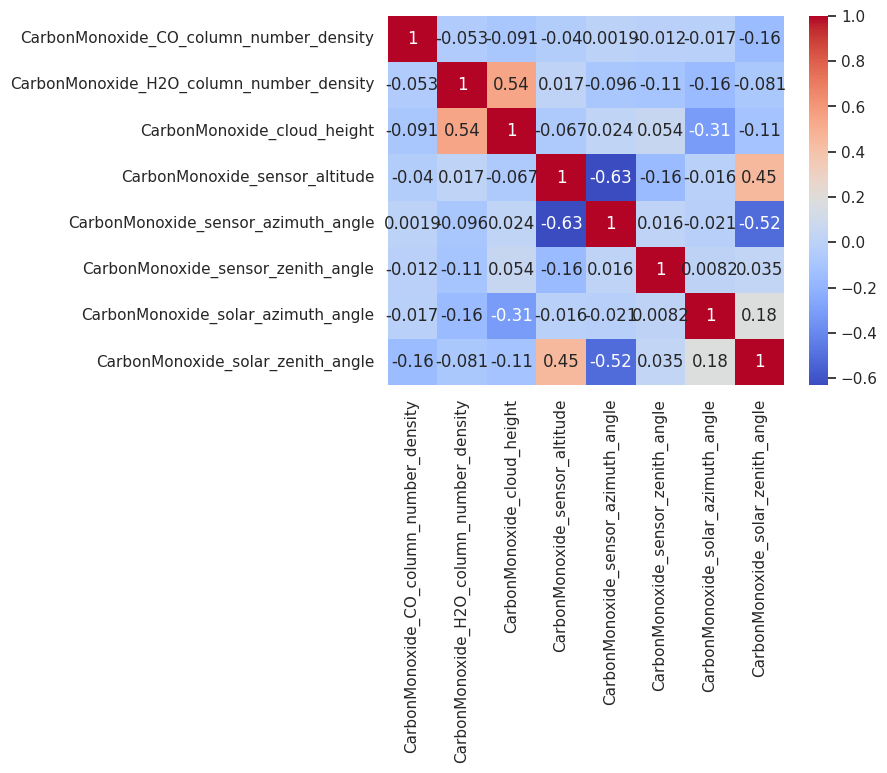

In [377]:
### Checking CarbonMonoxide details

sns.heatmap(CarbonMonoxide_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [378]:
### Checking VIF of the dataset and selecting cols accordingly

CarbonMonoxide_vif_data = pd.DataFrame()
CarbonMonoxide_vif_data["Variable"] = CarbonMonoxide_df.columns
CarbonMonoxide_vif_data["VIF"] = [variance_inflation_factor(CarbonMonoxide_df.values, i) for i in range(CarbonMonoxide_df.shape[1])]

CarbonMonoxide_vif_data

Variable         VIF
0   CarbonMonoxide_CO_column_number_density   33.697011
1  CarbonMonoxide_H2O_column_number_density   19.442044
2               CarbonMonoxide_cloud_height   22.242730
3            CarbonMonoxide_sensor_altitude  145.028232
4       CarbonMonoxide_sensor_azimuth_angle    1.461905
5        CarbonMonoxide_sensor_zenith_angle   14.585199
6        CarbonMonoxide_solar_azimuth_angle    7.216323
7         CarbonMonoxide_solar_zenith_angle   50.651312

In [379]:
CarbonMonoxide_df.drop(["CarbonMonoxide_CO_column_number_density", "CarbonMonoxide_H2O_column_number_density",
                        "CarbonMonoxide_cloud_height", "CarbonMonoxide_sensor_altitude", "CarbonMonoxide_sensor_zenith_angle",
                        "CarbonMonoxide_solar_zenith_angle"], axis=1, inplace=True)

In [380]:
CarbonMonoxide_df.head(2)

CarbonMonoxide_sensor_azimuth_angle  CarbonMonoxide_solar_azimuth_angle
0                            71.111977                         -149.875565
1                            -1.019594                         -140.158048

**Dealing with NitrogenDioxide_df**

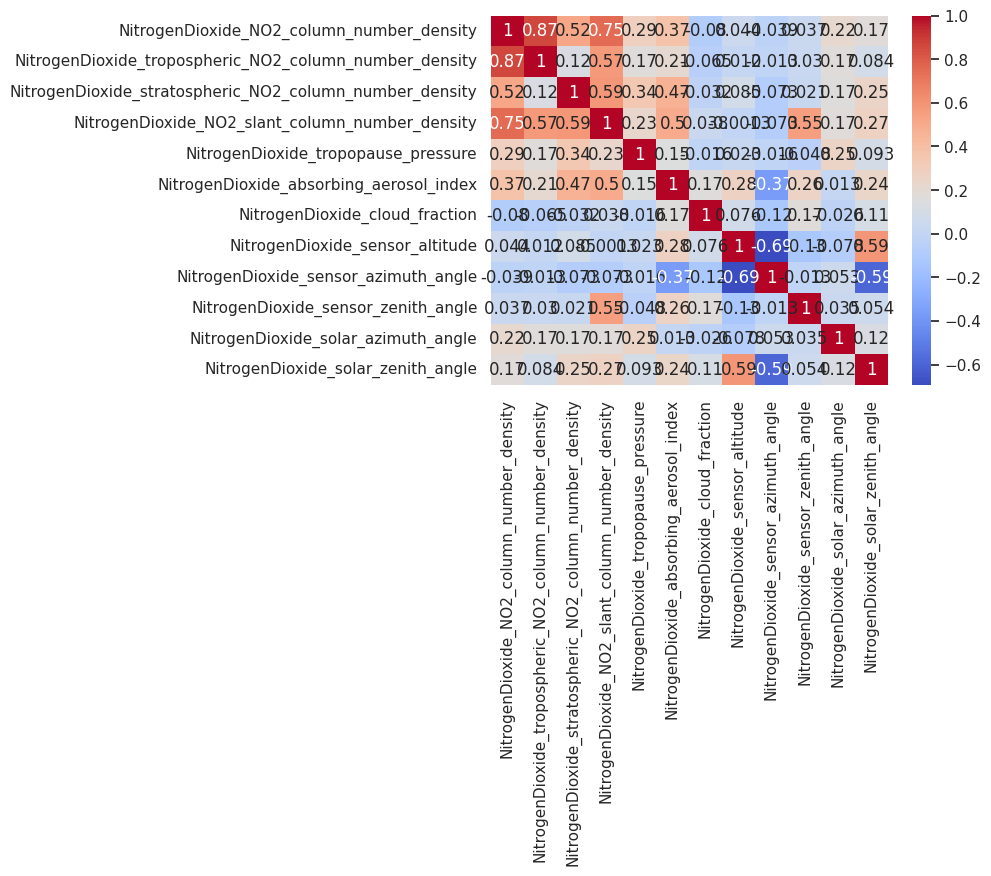

In [381]:
### Checking NitrogenDioxide details

sns.heatmap(NitrogenDioxide_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [382]:
### Dropping few columns based on the correlation matrix

NitrogenDioxide_df.drop(["NitrogenDioxide_NO2_column_number_density","NitrogenDioxide_tropospheric_NO2_column_number_density",
                         "NitrogenDioxide_NO2_slant_column_number_density"],axis=1,inplace= True)

In [383]:
### Checking VIF of the dataset and selecting cols accordingly

NitrogenDioxide_vif_data = pd.DataFrame()
NitrogenDioxide_vif_data["Variable"] = NitrogenDioxide_df.columns
NitrogenDioxide_vif_data["VIF"] = [variance_inflation_factor(NitrogenDioxide_df.values, i) for i in range(NitrogenDioxide_df.shape[1])]

NitrogenDioxide_vif_data

Variable         VIF
0  NitrogenDioxide_stratospheric_NO2_column_numbe...  140.741553
1                NitrogenDioxide_tropopause_pressure  156.278849
2            NitrogenDioxide_absorbing_aerosol_index   17.174854
3                     NitrogenDioxide_cloud_fraction    5.025068
4                    NitrogenDioxide_sensor_altitude  354.643122
5               NitrogenDioxide_sensor_azimuth_angle    1.973949
6                NitrogenDioxide_sensor_zenith_angle    9.897829
7                NitrogenDioxide_solar_azimuth_angle    8.511682
8                 NitrogenDioxide_solar_zenith_angle   58.818473

In [384]:
NitrogenDioxide_df.drop(["NitrogenDioxide_stratospheric_NO2_column_number_density","NitrogenDioxide_tropopause_pressure",
                         "NitrogenDioxide_absorbing_aerosol_index","NitrogenDioxide_sensor_altitude","NitrogenDioxide_sensor_zenith_angle",
                        "NitrogenDioxide_solar_zenith_angle"],axis=1,inplace=True)

In [385]:
NitrogenDioxide_df.head(2)

NitrogenDioxide_cloud_fraction  NitrogenDioxide_sensor_azimuth_angle  \
0                        0.097008                            -15.937696   
1                        0.067038                              5.471037   

   NitrogenDioxide_solar_azimuth_angle  
0                           -84.260082  
1                          -138.343908

**Now Dealing with Formaldehyde**

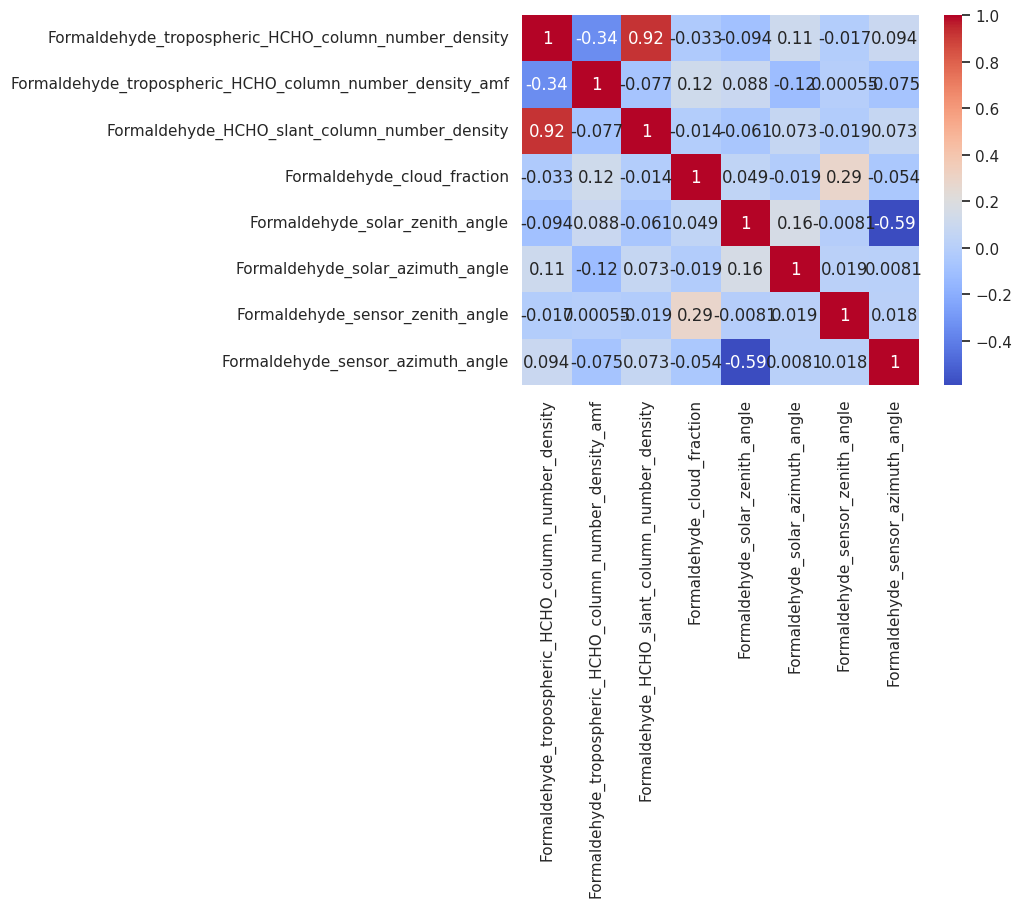

In [386]:
### Checking Formaldehyde details

sns.heatmap(Formaldehyde_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [387]:
### Dropping few columns based on correlation details

Formaldehyde_df.drop(["Formaldehyde_tropospheric_HCHO_column_number_density","Formaldehyde_HCHO_slant_column_number_density"],axis=1,inplace=True)

In [388]:
### Checking VIF of the dataset and selecting cols accordingly

Formaldehyde_vif_data = pd.DataFrame()
Formaldehyde_vif_data["Variable"] = Formaldehyde_df.columns
Formaldehyde_vif_data["VIF"] = [variance_inflation_factor(Formaldehyde_df.values, i) for i in range(Formaldehyde_df.shape[1])]

Formaldehyde_vif_data

Variable        VIF
0  Formaldehyde_tropospheric_HCHO_column_number_d...  20.574025
1                        Formaldehyde_cloud_fraction   7.500631
2                    Formaldehyde_solar_zenith_angle  21.945396
3                   Formaldehyde_solar_azimuth_angle   6.012883
4                   Formaldehyde_sensor_zenith_angle  11.843950
5                  Formaldehyde_sensor_azimuth_angle   1.278385

In [389]:
### Dropping few columns as per the VIF results

Formaldehyde_df.drop(["Formaldehyde_tropospheric_HCHO_column_number_density_amf",
                      "Formaldehyde_solar_zenith_angle","Formaldehyde_sensor_zenith_angle"],axis=1,inplace=True)

In [390]:
Formaldehyde_df.head(2)

Formaldehyde_cloud_fraction  Formaldehyde_solar_azimuth_angle  \
0                     0.255668                       -130.050797   
1                     0.200754                       -141.814827   

   Formaldehyde_sensor_azimuth_angle  
0                         -98.593887  
1                           4.678839

**Dealing with UvAerosolIndex**

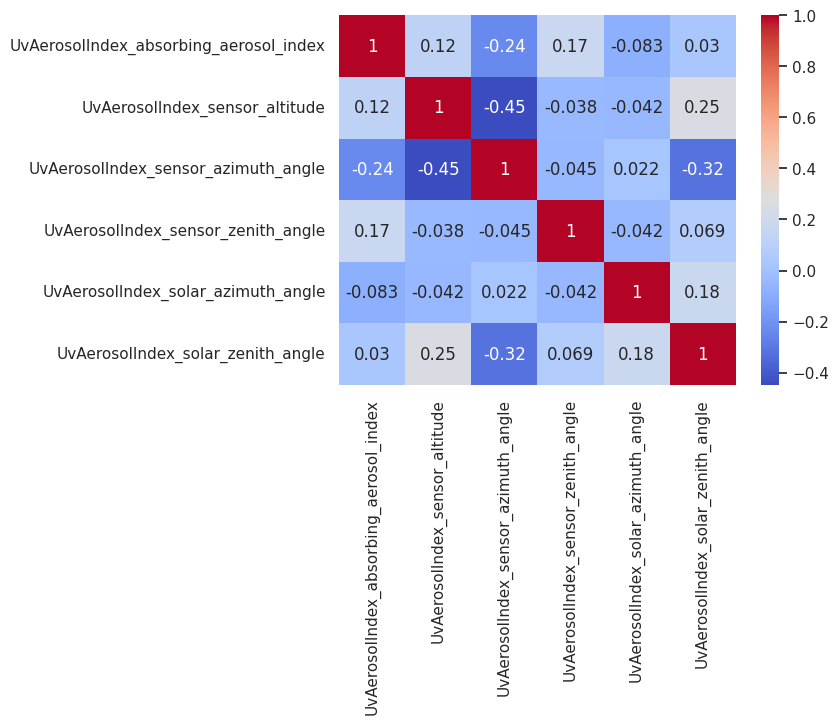

In [391]:
### Checking UvAerosolIndex details

sns.heatmap(UvAerosolIndex_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [392]:
### Checking VIF of the dataset and selecting cols accordingly

UvAerosolIndex_vif_data = pd.DataFrame()
UvAerosolIndex_vif_data["Variable"] = UvAerosolIndex_df.columns
UvAerosolIndex_vif_data["VIF"] = [variance_inflation_factor(UvAerosolIndex_df.values, i) for i in range(UvAerosolIndex_df.shape[1])]

UvAerosolIndex_vif_data

Variable         VIF
0  UvAerosolIndex_absorbing_aerosol_index   11.229111
1          UvAerosolIndex_sensor_altitude  120.104370
2     UvAerosolIndex_sensor_azimuth_angle    1.466880
3      UvAerosolIndex_sensor_zenith_angle   52.405477
4      UvAerosolIndex_solar_azimuth_angle    6.664073
5       UvAerosolIndex_solar_zenith_angle   50.471221

In [393]:
UvAerosolIndex_df.drop(["UvAerosolIndex_absorbing_aerosol_index","UvAerosolIndex_sensor_altitude","UvAerosolIndex_sensor_zenith_angle",
                              "UvAerosolIndex_solar_zenith_angle"],axis=1,inplace=True)

In [394]:
UvAerosolIndex_df.head(2)

UvAerosolIndex_sensor_azimuth_angle  UvAerosolIndex_solar_azimuth_angle
0                           -12.628979                         -138.786446
1                            16.152492                         -142.786141

**Now Dealing with Ozone**

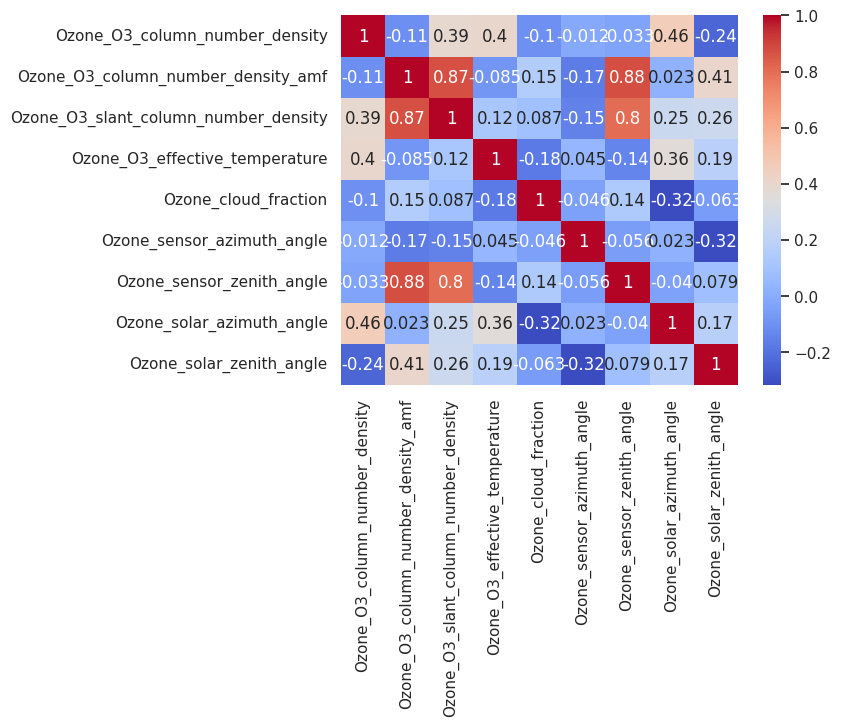

In [395]:
### Checking Ozone details

sns.heatmap(Ozone_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [396]:
### Dropping few columns based on correlation details

Ozone_df.drop(["Ozone_O3_column_number_density_amf","Ozone_O3_slant_column_number_density","Ozone_sensor_zenith_angle"],axis=1,inplace= True)

In [397]:
### Checking VIF of the dataset and selecting cols accordingly

Ozone_vif_data = pd.DataFrame()
Ozone_vif_data["Variable"] = Ozone_df.columns
Ozone_vif_data["VIF"] = [variance_inflation_factor(Ozone_df.values, i) for i in range(Ozone_df.shape[1])]

Ozone_vif_data

Variable          VIF
0  Ozone_O3_column_number_density  2358.420425
1  Ozone_O3_effective_temperature  2895.500639
2            Ozone_cloud_fraction    10.609813
3      Ozone_sensor_azimuth_angle     1.473755
4       Ozone_solar_azimuth_angle     9.123550
5        Ozone_solar_zenith_angle    65.946418

In [398]:
Ozone_df_new = Ozone_df["Ozone_sensor_azimuth_angle"]

**Now dealing with Cloud**

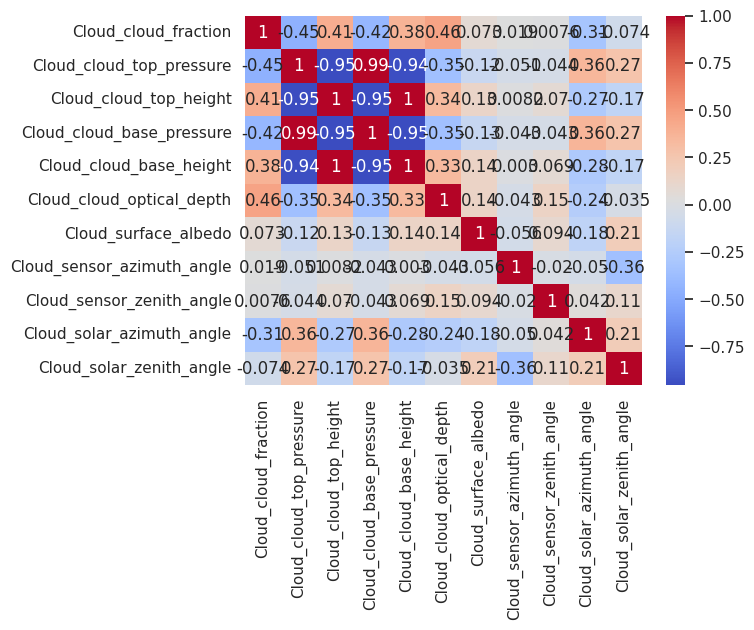

In [399]:
### Checking Cloud details

sns.heatmap(Cloud_df.corr(),annot = True,cmap = "coolwarm")
plt.show()

In [400]:
### Dropping the valyues based on correlation matrix

Cloud_df.drop(["Cloud_cloud_top_pressure","Cloud_cloud_top_height","Cloud_cloud_base_pressure",
               "Cloud_cloud_base_height"],axis=1,inplace= True)

In [401]:
### Checking VIF of the dataset and selecting cols accordingly

Cloud_vif_data = pd.DataFrame()
Cloud_vif_data["Variable"] = Cloud_df.columns
Cloud_vif_data["VIF"] = [variance_inflation_factor(Cloud_df.values, i) for i in range(Cloud_df.shape[1])]

Cloud_vif_data

Variable        VIF
0        Cloud_cloud_fraction  12.978630
1   Cloud_cloud_optical_depth   3.975543
2        Cloud_surface_albedo  32.064079
3  Cloud_sensor_azimuth_angle   1.259022
4   Cloud_sensor_zenith_angle  30.890936
5   Cloud_solar_azimuth_angle   7.329369
6    Cloud_solar_zenith_angle  37.314738

In [402]:
Cloud_df_new = Cloud_df[["Cloud_cloud_optical_depth", "Cloud_sensor_azimuth_angle", "Cloud_solar_azimuth_angle"]]


**Now Combining all the cols that got selected for further pre processing**

In [403]:
#### Selected cols from orginal dataset

selected_cols = df[["latitude","longitude","year","week_no","emission"]]

df = pd.concat([selected_cols,
                         sulphur_dioxide_df,
                         CarbonMonoxide_df,
                         NitrogenDioxide_df,
                         Formaldehyde_df,
                         UvAerosolIndex_df,
                         Ozone_df_new,
                         Cloud_df_new], axis=1)

In [404]:
df.shape

(79023, 21)

**EDA (Exploratory Data Analysis)**

In [405]:
df.head()

latitude  longitude  year  week_no  emission  \
0     -0.51      29.29  2019        0  3.750994   
1     -0.51      29.29  2019        1  4.025176   
2     -0.51      29.29  2019        2  4.231381   
3     -0.51      29.29  2019        3  4.305286   
4     -0.51      29.29  2019        4  4.347317   

   SulphurDioxide_sensor_azimuth_angle  SulphurDioxide_solar_azimuth_angle  \
0                           -98.593887                         -130.050797   
1                            16.592861                         -140.874435   
2                            72.795837                         -150.191757   
3                            -7.925870                          -83.833174   
4                             4.121269                         -137.409159   

   CarbonMonoxide_sensor_azimuth_angle  CarbonMonoxide_solar_azimuth_angle  \
0                            71.111977                         -149.875565   
1                            -1.019594                         -140.158048   
2                           -54.801144                         -133.683714   
3                            28.916541                         -142.575915   
4                           -12.501663                         -134.854258   

   NitrogenDioxide_cloud_fraction  NitrogenDioxide_sensor_azimuth_angle  \
0                        0.097008                            -15.937696   
1                        0.067038                              5.471037   
2                        0.072135                             72.795837   
3                        0.097008                            -15.937696   
4                        0.049393                            -13.431798   

   NitrogenDioxide_solar_azimuth_angle  Formaldehyde_cloud_fraction  \
0                           -84.260082                     0.255668   
1                          -138.343908                     0.200754   
2                          -150.191757                     0.279449   
3                           -84.260082                     0.228801   
4                          -136.257947                     0.160090   

   Formaldehyde_solar_azimuth_angle  Formaldehyde_sensor_azimuth_angle  \
0                       -130.050797                         -98.593887   
1                       -141.814827                           4.678839   
2                       -135.667160                         -41.363579   
3                        -84.605844                          -9.396089   
4                       -134.826557                         -12.837398   

   UvAerosolIndex_sensor_azimuth_angle  UvAerosolIndex_solar_azimuth_angle  \
0                           -12.628979                         -138.786446   
1                            16.152492                         -142.786141   
2                           -41.557633                         -135.364627   
3                            -0.001270                         -137.489602   
4                            -0.604325                         -136.448518   

   Ozone_sensor_azimuth_angle  Cloud_cloud_optical_depth  \
0                  -12.628979                  15.568533   
1                   24.464335                   8.690601   
2                  -41.557633                  21.103410   
3                   -0.001270                  15.386899   
4                   -0.604325                   8.114694   

   Cloud_sensor_azimuth_angle  Cloud_solar_azimuth_angle  
0                  -12.628986                -138.786423  
1                   30.359375                -145.183930  
2                   15.377883                -142.519545  
3                  -11.293399                -132.665828  
4                   38.532263                -141.509805

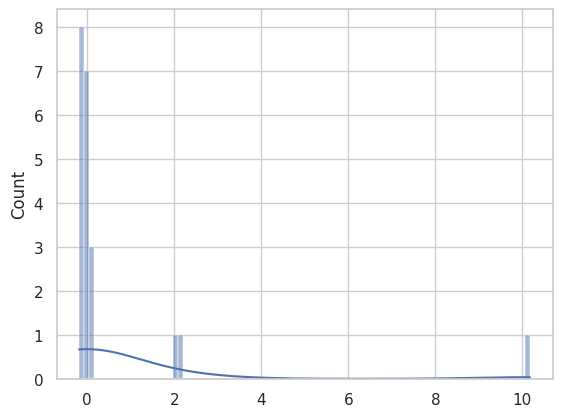

In [406]:
### Checking the Dataset Skewness

sns.histplot(df.skew(), kde= True)
plt.show()

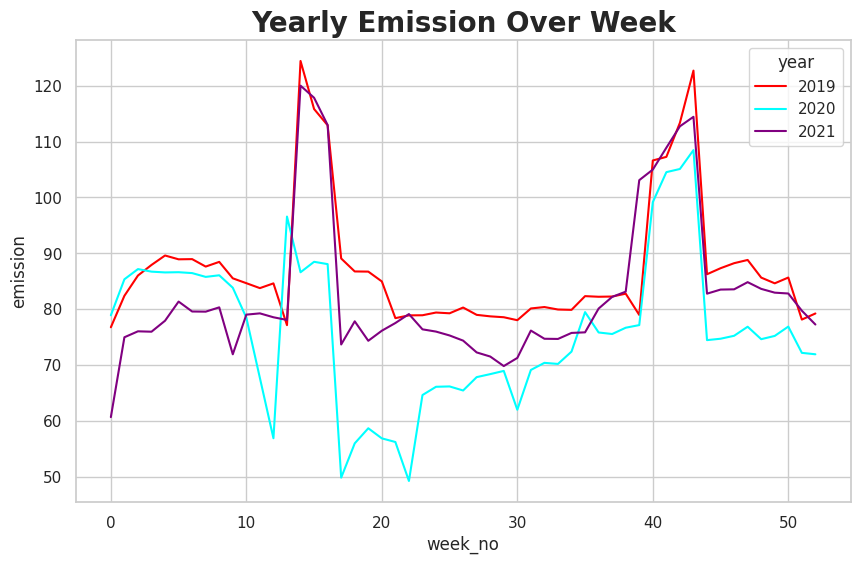

In [407]:
### Checking yearly emission over the week

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df[['year', 'week_no', 'emission']].groupby(['year', 'week_no'])['emission'].mean().reset_index(),
    x='week_no',
    y='emission',
    hue='year',
    palette=["red", "cyan", "purple"],
    errorbar=None
)

plt.title('Yearly Emission Over Week', fontsize=20, fontweight='bold')
plt.show()


In [410]:
### Checking the location where CO2 Emission got impacted using map

import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    size="emission",
    color="emission",
    color_continuous_scale='Viridis',
    size_max=20,
    zoom=6
)

fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(
    title="Emission Data Map Visualization",
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
)

fig.show()


Checking the behavior of all columns with target variables

In [411]:
data_variables = df.columns[df.columns != "emission"]

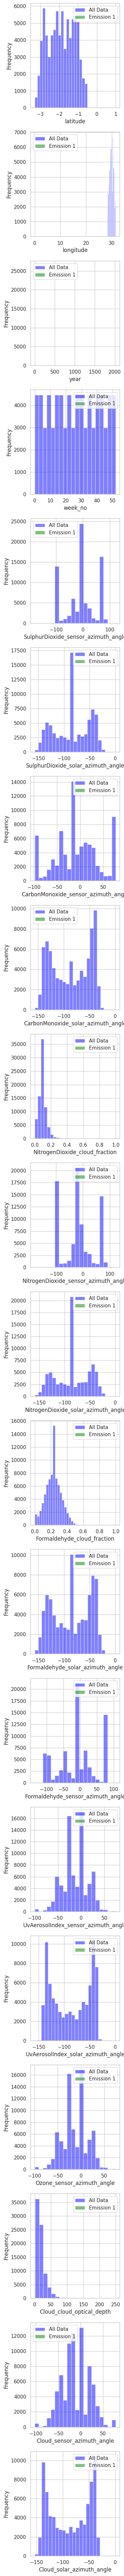

In [412]:
fig, axes = plt.subplots(nrows=len(data_variables), ncols=1, figsize=(4,4 * len(data_variables)))
for i, variable in enumerate(data_variables):
    ax = axes[i]
    ax.hist(df[variable], bins=20, alpha=0.5, label="All Data", color='blue')
    ax.hist(df[df["emission"] == 1][variable], bins=20, alpha=0.5, label="Emission 1", color='green')
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

In [413]:
### Selecting relevant cols and using VIF for that


final_vif_data = pd.DataFrame()
final_vif_data["Variable"] = df.columns
final_vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

final_vif_data

Variable          VIF
0                               latitude     8.981787
1                              longitude  1486.944371
2                                   year  1560.154648
3                                week_no     4.079390
4                               emission     1.339611
5    SulphurDioxide_sensor_azimuth_angle     3.022959
6     SulphurDioxide_solar_azimuth_angle    72.291899
7    CarbonMonoxide_sensor_azimuth_angle     1.685984
8     CarbonMonoxide_solar_azimuth_angle   222.298284
9         NitrogenDioxide_cloud_fraction     5.678975
10  NitrogenDioxide_sensor_azimuth_angle     2.762315
11   NitrogenDioxide_solar_azimuth_angle    52.967957
12           Formaldehyde_cloud_fraction     8.394841
13      Formaldehyde_solar_azimuth_angle    97.729705
14     Formaldehyde_sensor_azimuth_angle     2.463305
15   UvAerosolIndex_sensor_azimuth_angle    74.258429
16    UvAerosolIndex_solar_azimuth_angle  1668.022891
17            Ozone_sensor_azimuth_angle    77.746892
18             Cloud_cloud_optical_depth     3.325782
19            Cloud_sensor_azimuth_angle     2.997019
20             Cloud_solar_azimuth_angle  1347.538084

In [414]:
#### Removing high multi colinear colums

df.drop(["longitude","year","SulphurDioxide_solar_azimuth_angle","CarbonMonoxide_solar_azimuth_angle","NitrogenDioxide_solar_azimuth_angle",
         "Formaldehyde_solar_azimuth_angle","UvAerosolIndex_sensor_azimuth_angle","UvAerosolIndex_solar_azimuth_angle","Ozone_sensor_azimuth_angle",
         "Cloud_solar_azimuth_angle"],axis=1,inplace= True)

In [415]:
df.head()

latitude  week_no  emission  SulphurDioxide_sensor_azimuth_angle  \
0     -0.51        0  3.750994                           -98.593887   
1     -0.51        1  4.025176                            16.592861   
2     -0.51        2  4.231381                            72.795837   
3     -0.51        3  4.305286                            -7.925870   
4     -0.51        4  4.347317                             4.121269   

   CarbonMonoxide_sensor_azimuth_angle  NitrogenDioxide_cloud_fraction  \
0                            71.111977                        0.097008   
1                            -1.019594                        0.067038   
2                           -54.801144                        0.072135   
3                            28.916541                        0.097008   
4                           -12.501663                        0.049393   

   NitrogenDioxide_sensor_azimuth_angle  Formaldehyde_cloud_fraction  \
0                            -15.937696                     0.255668   
1                              5.471037                     0.200754   
2                             72.795837                     0.279449   
3                            -15.937696                     0.228801   
4                            -13.431798                     0.160090   

   Formaldehyde_sensor_azimuth_angle  Cloud_cloud_optical_depth  \
0                         -98.593887                  15.568533   
1                           4.678839                   8.690601   
2                         -41.363579                  21.103410   
3                          -9.396089                  15.386899   
4                         -12.837398                   8.114694   

   Cloud_sensor_azimuth_angle  
0                  -12.628986  
1                   30.359375  
2                   15.377883  
3                  -11.293399  
4                   38.532263

In [416]:
df.shape

(79023, 11)

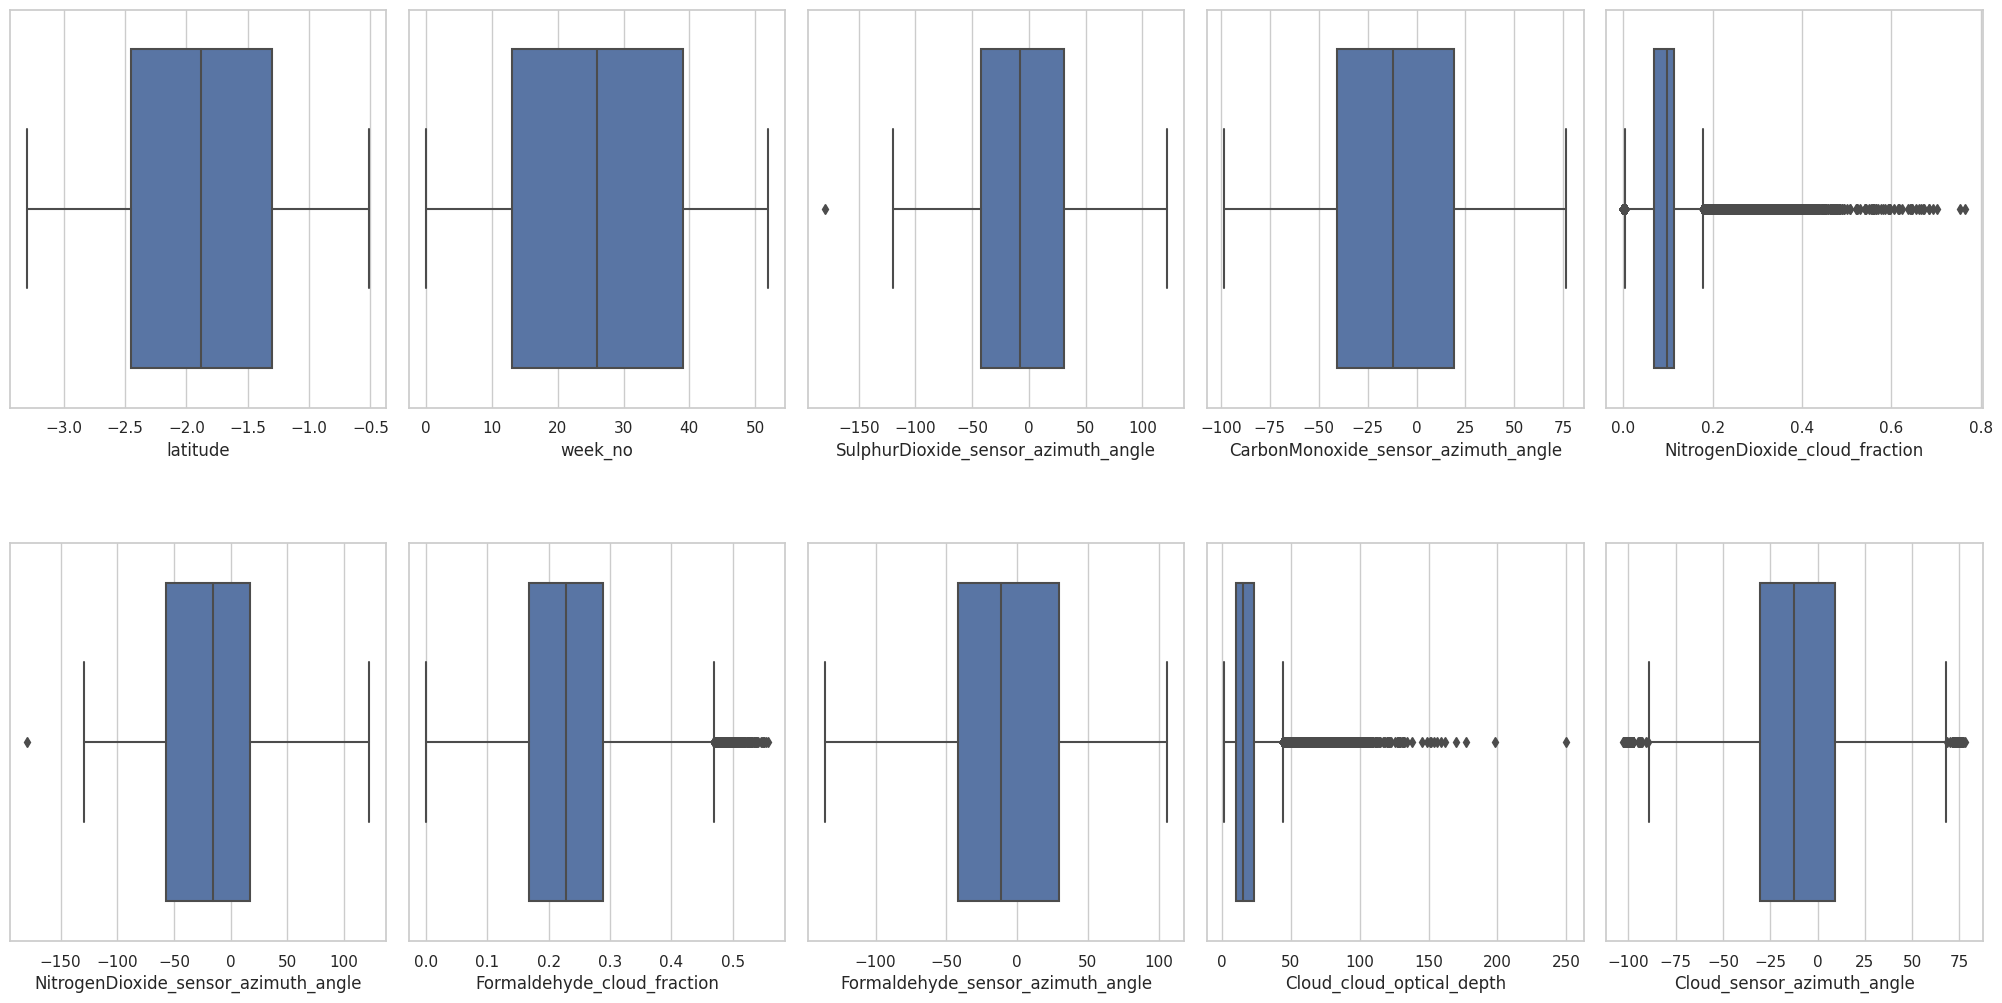

In [417]:
#### Checking for Outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in df.columns:
    if col != "emission":
        sns.boxplot(x=col, data=df, ax=ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [418]:
### Checking the shape of my orignal dataset

df.shape

(79023, 11)

In [419]:
### Checking for outliers

from scipy import stats

X = df.drop(columns=['emission'])
z_scores = stats.zscore(X)

In [420]:
z_score_df = pd.DataFrame(z_scores, columns=X.columns)
outliers = df[(z_score_df.abs() > 3).any(axis=1)]
outliers.head()

latitude  week_no  emission  SulphurDioxide_sensor_azimuth_angle  \
180    -0.528       21  4.112093                           -12.531048   
292    -0.528       27  4.003774                            30.071922   
319    -0.547        1  0.529315                           -13.059029   
368    -0.547       50  0.578456                           -12.925669   
416    -0.547       45  0.594113                          -106.749191   

     CarbonMonoxide_sensor_azimuth_angle  NitrogenDioxide_cloud_fraction  \
180                           -96.640057                        0.251183   
292                           -13.098015                        0.166283   
319                           -13.314892                        0.276716   
368                            71.965553                        0.064936   
416                           -18.282479                        0.000000   

     NitrogenDioxide_sensor_azimuth_angle  Formaldehyde_cloud_fraction  \
180                            -98.578506                     0.266362   
292                             30.064884                     0.206904   
319                            -99.833899                     0.228801   
368                            -12.927158                     0.139935   
416                           -106.749191                     0.277031   

     Formaldehyde_sensor_azimuth_angle  Cloud_cloud_optical_depth  \
180                         -98.578506                  15.113874   
292                           4.035189                  63.672152   
319                          -9.396089                  29.586731   
368                         -12.929226                  65.091654   
416                         -43.414945                  66.468363   

     Cloud_sensor_azimuth_angle  
180                  -29.931977  
292                  -11.845260  
319                   29.390638  
368                  -64.767431  
416                   -0.803137

In [421]:
outliers.shape

(2567, 11)

**Approx 3.5% of the dataset have some outliers ,,, So deciding to drop the outliers as having outliers less that 5% in order to avoid ant biasness in the dataset**

In [422]:
df = df.drop(outliers.index)

In [423]:
df.shape

(76456, 11)

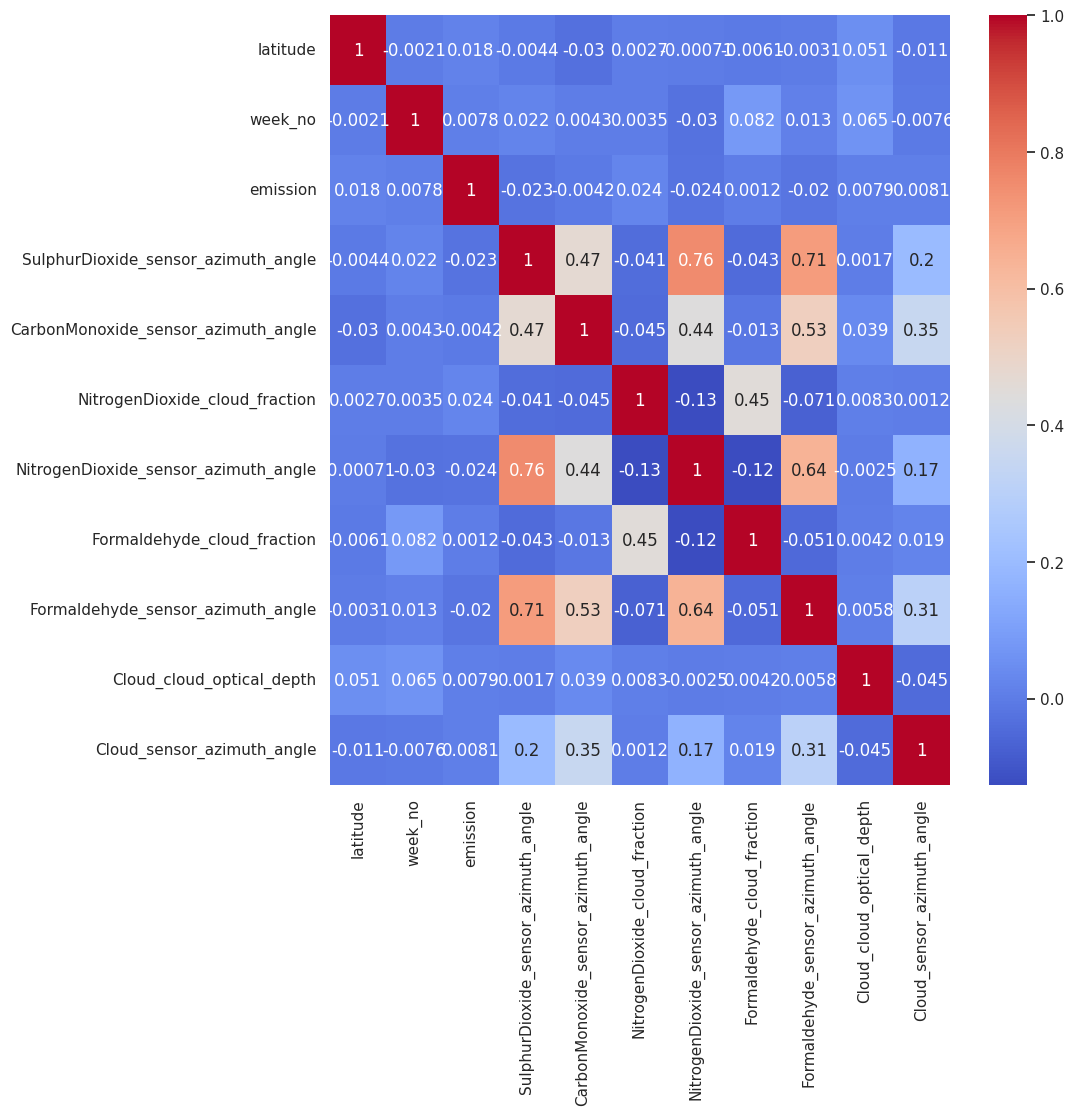

In [424]:
### Checking the correlations between columns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [425]:
### Dropping few more columns from the data and taking correlation threshold as 0.7 or 70%

df.drop(["SulphurDioxide_sensor_azimuth_angle","NitrogenDioxide_sensor_azimuth_angle",
         "Formaldehyde_sensor_azimuth_angle"],axis=1,inplace=True)

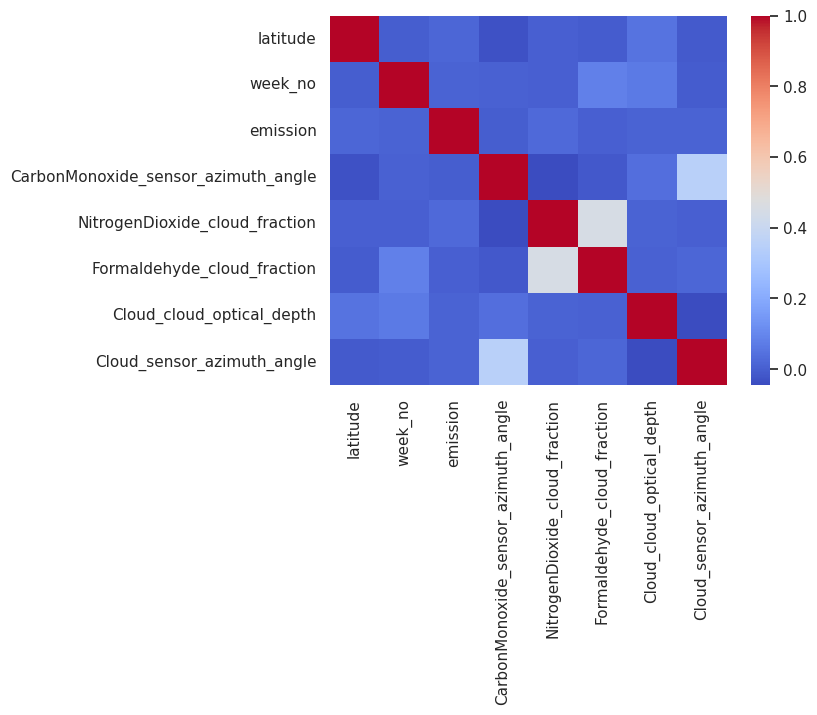

In [426]:
### Checking the correlations details again

sns.heatmap(df.corr(),annot=False,cmap="coolwarm")
plt.show()

In [427]:
### Seprating my dependent and independent variables

X = df.drop(columns=["emission"])
y = df["emission"]

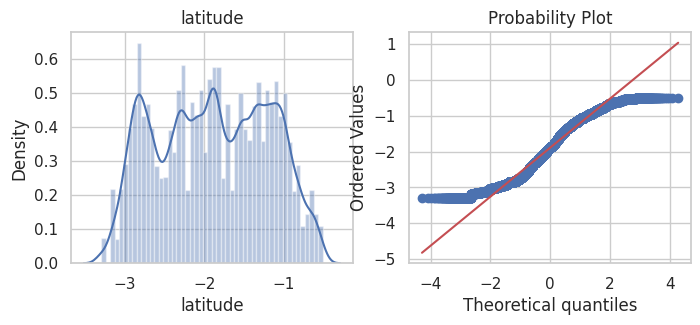

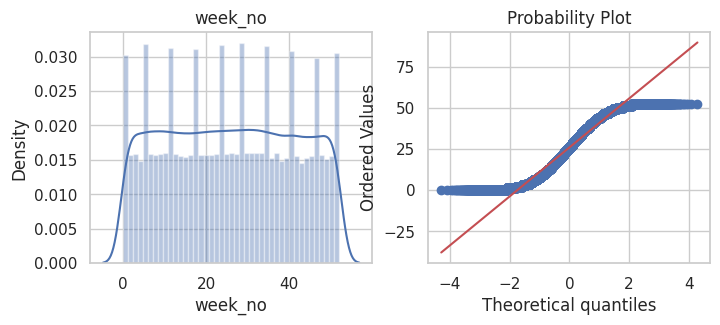

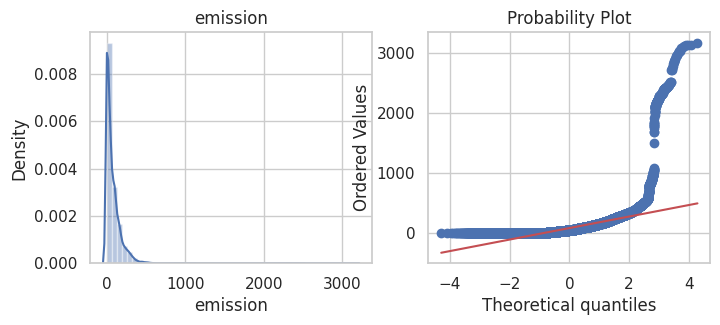

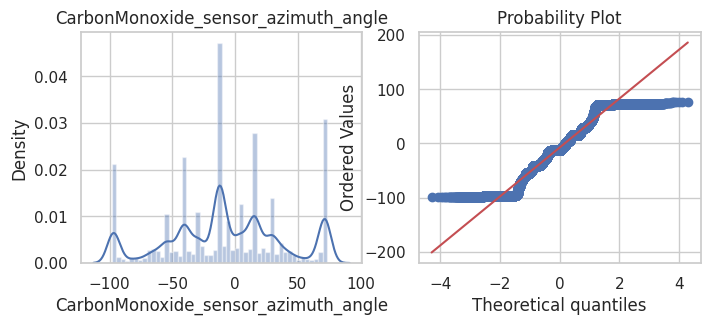

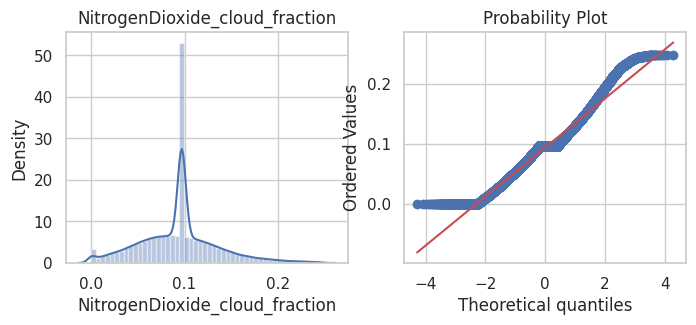

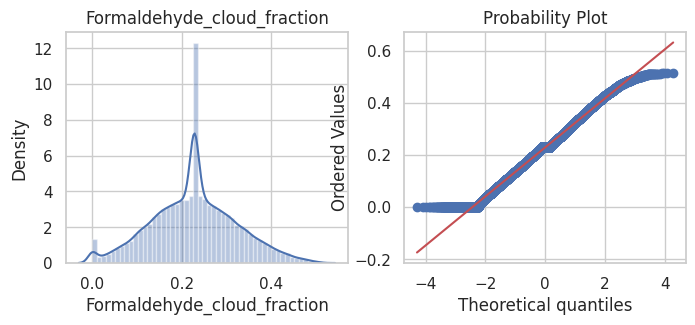

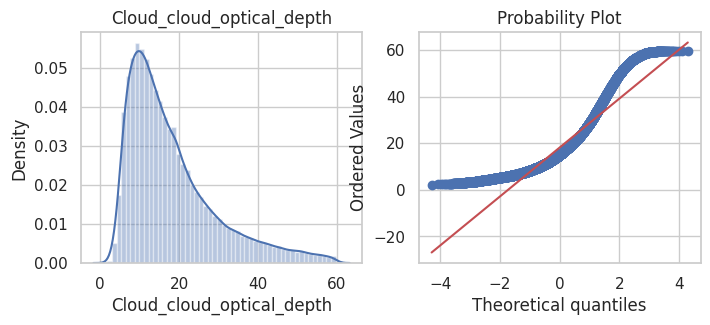

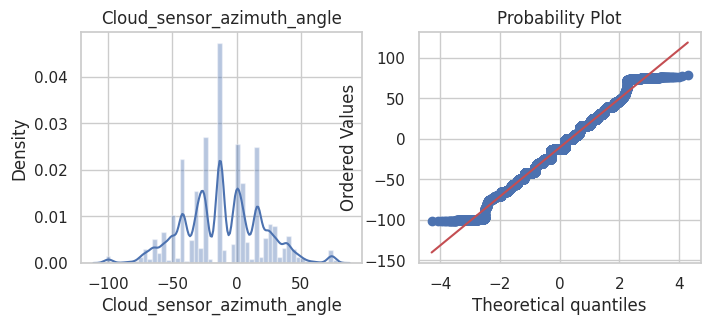

In [428]:
### Checking data distribution and QQ plot of every variables

for col in df.columns:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm" , plot = plt)
    plt.show()

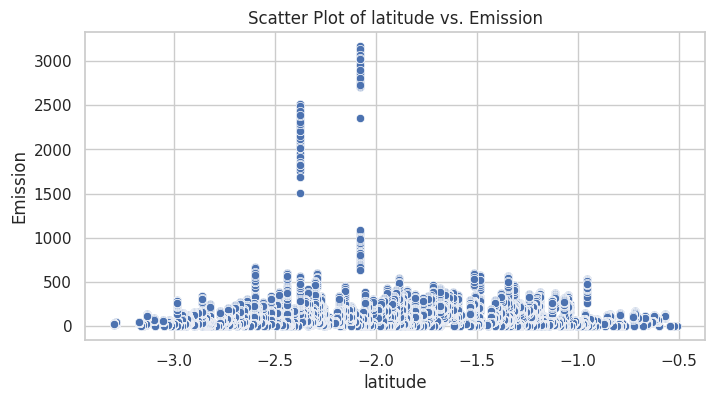

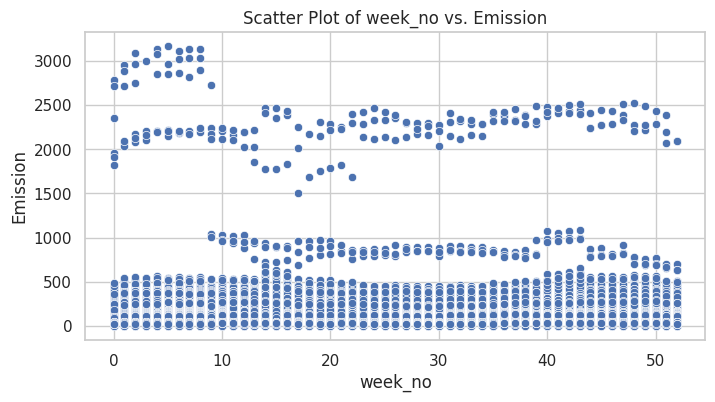

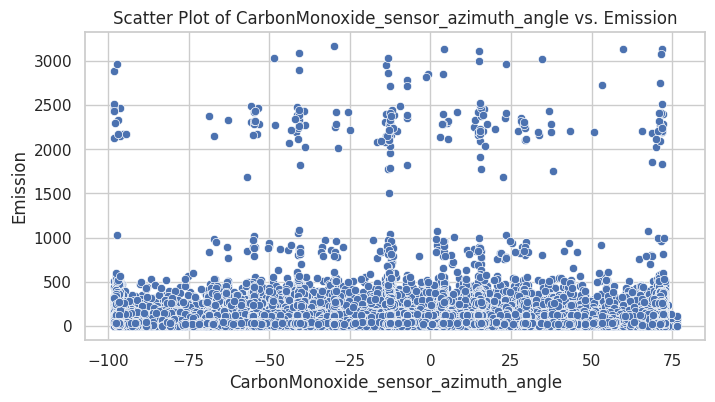

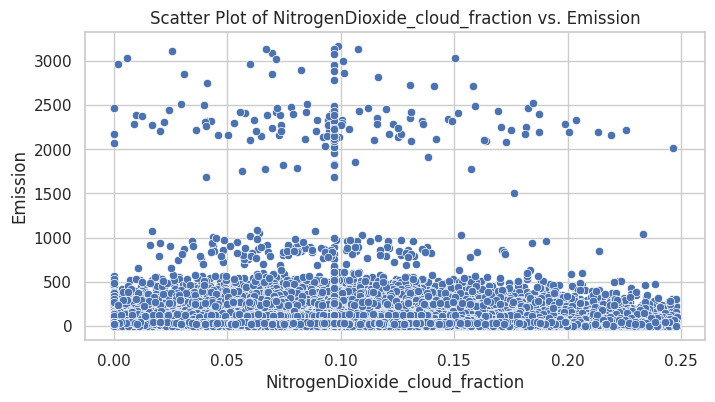

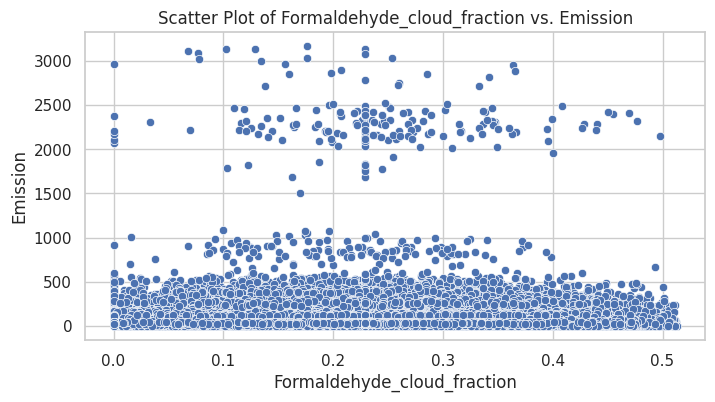

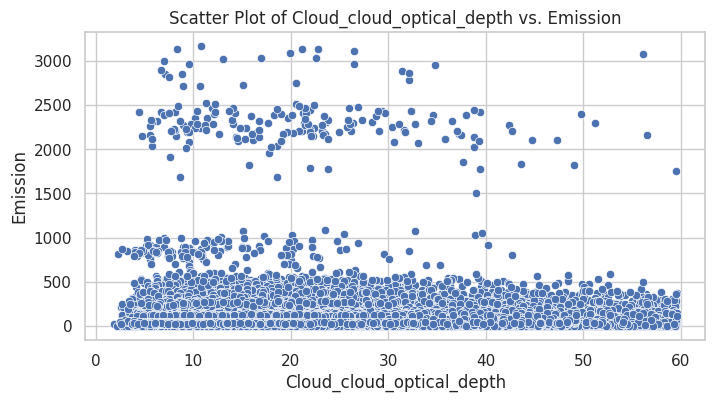

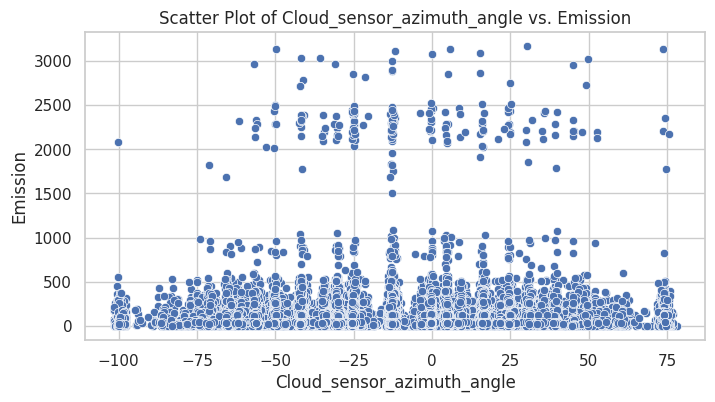

In [429]:
for col in X.columns:
    plt.figure(figsize=(8, 4))

    sns.scatterplot(data=df, x=col, y=y)

    plt.xlabel(col)
    plt.ylabel("Emission")
    plt.title(f"Scatter Plot of {col} vs. Emission")

    plt.show()

In [430]:
#### Data Seems bit noisy so applying Power Transformer (Yeo-Johnson)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(X)
X = pd.DataFrame(df_transformed, columns=X.columns)
X.head()

latitude   week_no  CarbonMonoxide_sensor_azimuth_angle  \
0  2.104044 -2.018386                             1.712170   
1  2.104044 -1.876752                             0.137124   
2  2.104044 -1.754719                            -1.023973   
3  2.104044 -1.643894                             0.789800   
4  2.104044 -1.540720                            -0.111294   

   NitrogenDioxide_cloud_fraction  Formaldehyde_cloud_fraction  \
0                        0.126313                     0.299343   
1                       -0.623796                    -0.283271   
2                       -0.492211                     0.549488   
3                        0.126313                     0.015182   
4                       -1.092873                    -0.719366   

   Cloud_cloud_optical_depth  Cloud_sensor_azimuth_angle  
0                   0.057003                   -0.057381  
1                  -0.956429                    1.347845  
2                   0.571785                    0.861842  
3                   0.036911                   -0.013044  
4                  -1.076979                    1.612537

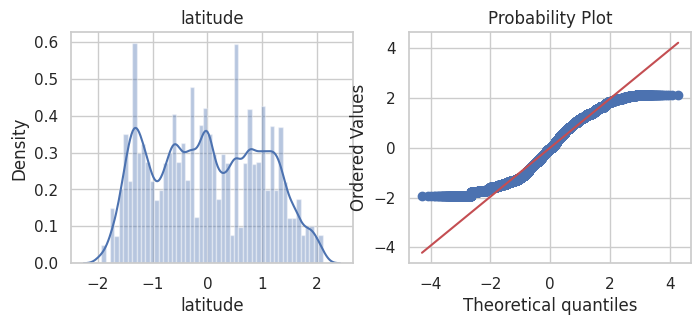

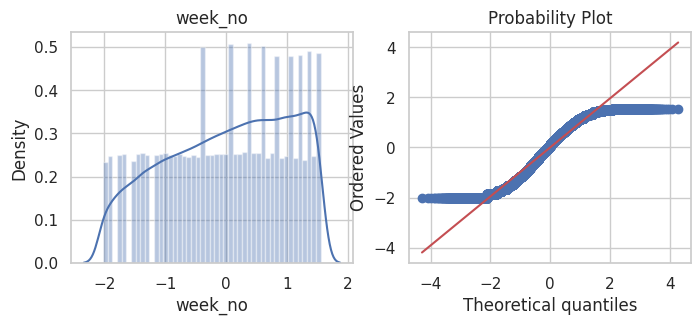

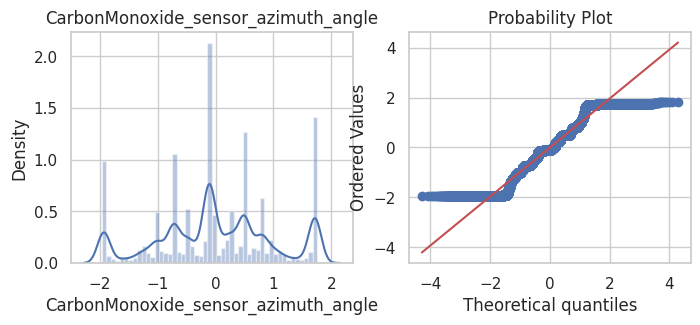

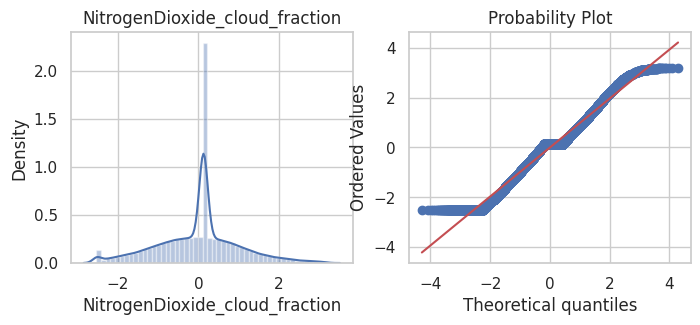

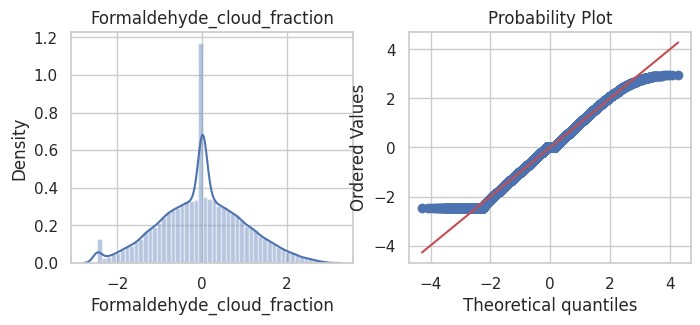

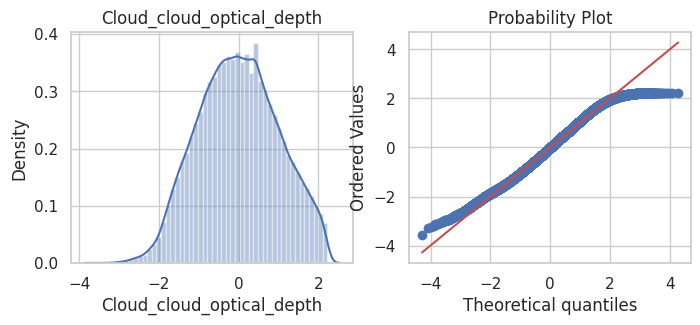

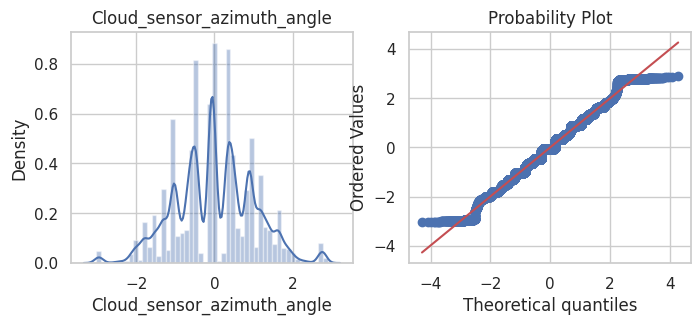

In [431]:
### Checking data distribution and QQ plot of every variables

for col in X.columns:
    plt.figure(figsize=(8, 3))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.show()

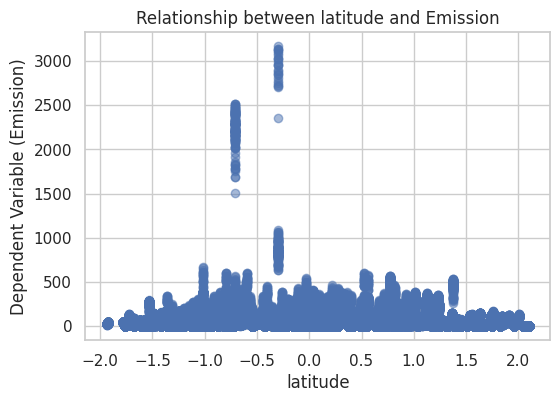

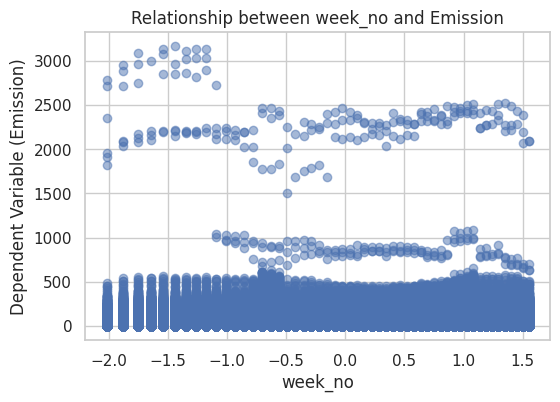

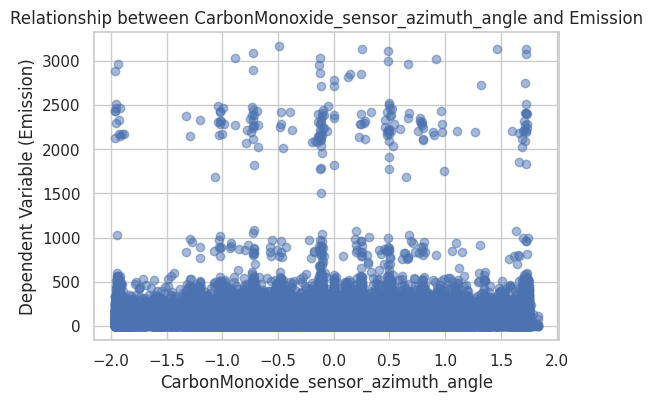

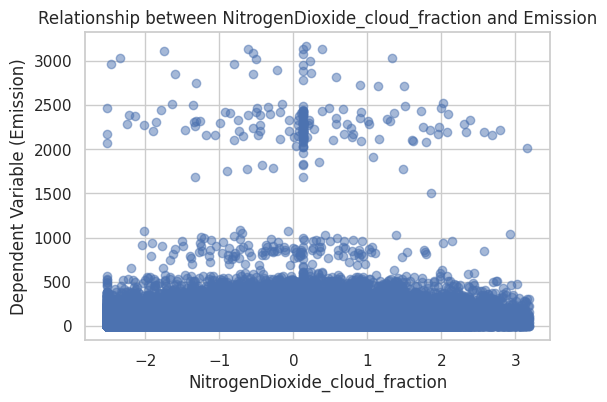

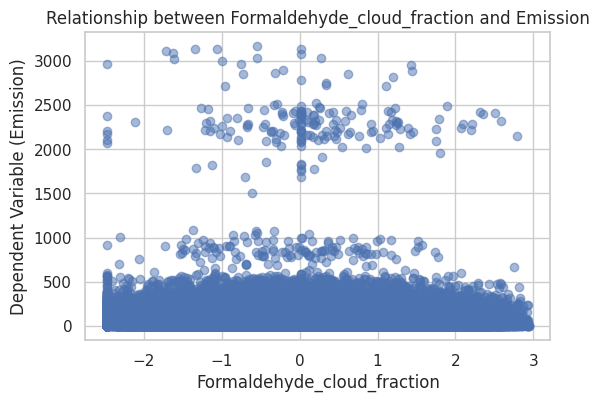

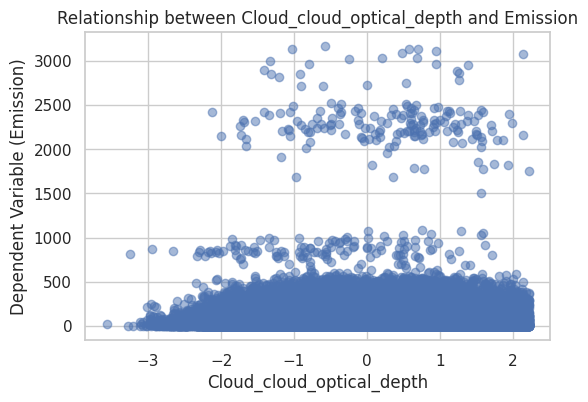

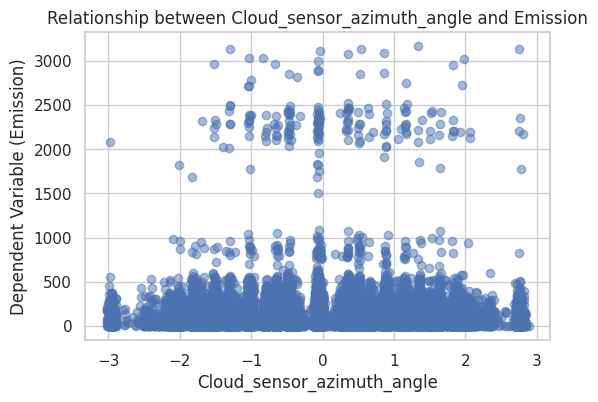

In [432]:
#### Checking every single independent and dependent variable relationship & behaviour

for col in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Dependent Variable (Emission)')
    plt.title(f'Relationship between {col} and Emission')
    plt.show()

In [435]:
X.head(2)

latitude   week_no  CarbonMonoxide_sensor_azimuth_angle  \
0  2.104044 -2.018386                             1.712170   
1  2.104044 -1.876752                             0.137124   

   NitrogenDioxide_cloud_fraction  Formaldehyde_cloud_fraction  \
0                        0.126313                     0.299343   
1                       -0.623796                    -0.283271   

   Cloud_cloud_optical_depth  Cloud_sensor_azimuth_angle  
0                   0.057003                   -0.057381  
1                  -0.956429                    1.347845

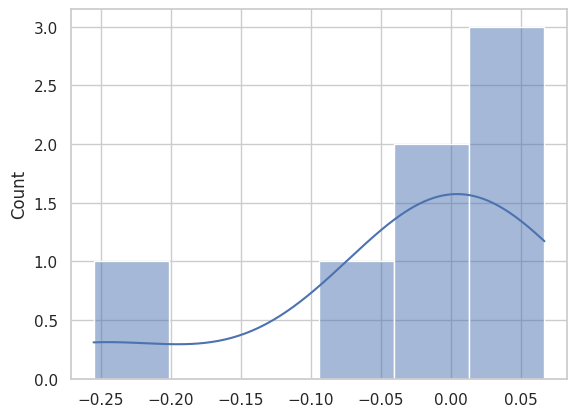

In [436]:
###  Checking the data skewness


sns.histplot(X.skew(), kde= True)
plt.show()

In [438]:
print(X.skew())

latitude                               0.066845
week_no                               -0.255062
CarbonMonoxide_sensor_azimuth_angle   -0.065267
NitrogenDioxide_cloud_fraction        -0.012195
Formaldehyde_cloud_fraction           -0.000623
Cloud_cloud_optical_depth              0.014553
Cloud_sensor_azimuth_angle             0.016936
dtype: float64


In [439]:
#### Spliting the data using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [440]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (61164, 7)
Shape of the training output data: (61164,)
Shape of the test input data: (15292, 7)
Shape of the test output data: (15292,)


In [441]:
#### Checking data with linear regression model

from sklearn.linear_model import LinearRegression

In [443]:
model = LinearRegression()
model

LinearRegression()

In [444]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [445]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [446]:
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 20385.93196643077
R-squared (R2) Score: 0.0018312187838941396


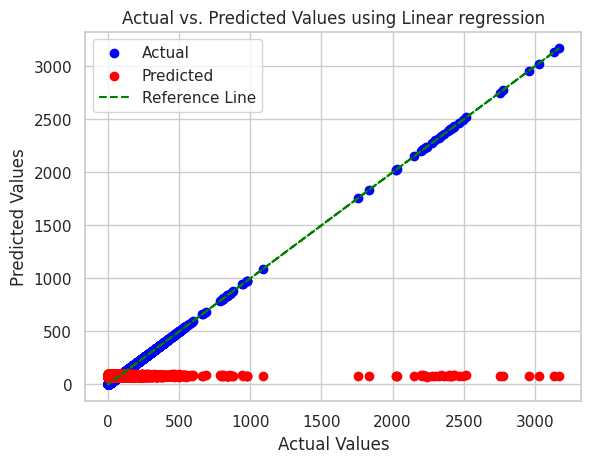

In [459]:
#### Checking the actual and predicted line relation curve

plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Reference Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values using Linear regression")
plt.legend()
plt.show()

**Linear Regression model didnt performed good so using some other model for prediction**

In [447]:
from sklearn.ensemble import RandomForestRegressor

In [448]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor

RandomForestRegressor(random_state=42)

In [449]:
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [450]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [451]:
print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (R2) Score (Random Forest):", r2_rf)

Mean Squared Error (Random Forest): 1230.5220108607302
R-squared (R2) Score (Random Forest): 0.9397492026431257


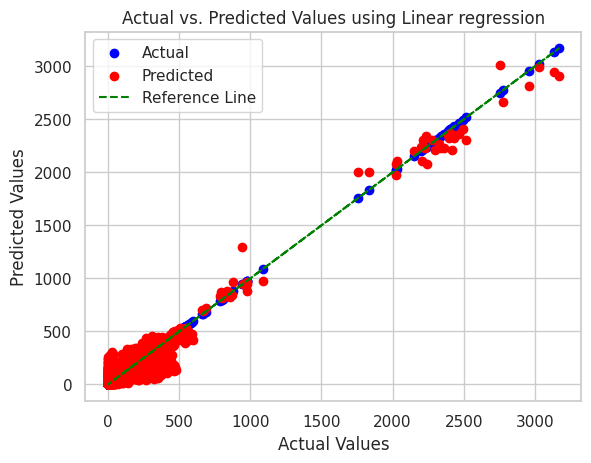

In [458]:
#### Checking the actual and predicted line relation curve

plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred_rf, color='red', label='Predicted')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Reference Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values using Random Forest regressor")
plt.legend()
plt.show()

**Using XGBoost Regressor**

In [452]:
from xgboost import XGBRegressor

In [453]:
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [454]:
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)


In [455]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [456]:
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R-squared (R2) Score (XGBoost):", r2_xgb)

Mean Squared Error (XGBoost): 2833.277609015677
R-squared (R2) Score (XGBoost): 0.8612725058390739


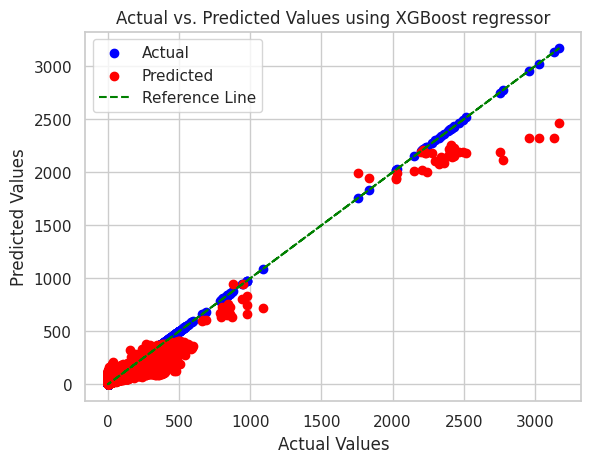

In [460]:
#### Checking the actual and predicted line relation curve

plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred_xgb, color='red', label='Predicted')
plt.plot(y_test, y_test, color='green', linestyle='--', label='Reference Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values using XGBoost regressor")
plt.legend()
plt.show()

**Random Forest Regressor is performing is good with the accuracy with 94%**